In [13]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## Time series analysis

In [2]:
df_energy_climate_2021 = pd.read_csv('../../data/prepared/df_energy_climate_2021.csv')

In [3]:
# difference
df_energy_climate_2021['energy_price_diff'] = df_energy_climate_2021['energy_price'].diff()

# difference in percentage
df_energy_climate_2021['energy_price_diff_pct'] = df_energy_climate_2021['energy_price'].pct_change()

# moving average
df_energy_climate_2021['energy_price_moving_avg'] = df_energy_climate_2021['energy_price'].rolling(3, min_periods=1).mean()


df_energy_climate_2021['energy_price_moving_avg'].head(10)

0    48.190000
1    46.435000
2    45.263333
3    42.663333
4    41.170000
5    40.073333
6    39.973333
7    40.330000
8    42.080000
9    43.716667
Name: energy_price_moving_avg, dtype: float64

In [4]:
# check correlation with energy_price shifted one day later
df_energy_climate_2021['energy_price_shift'] = df_energy_climate_2021['energy_price'].shift()

df_energy_climate_2021.corr(numeric_only=True)

,wind_speed,solar_radiation,tempreture,nuclear_power,not_renewable,renewable,energy_price,energy_price_diff,energy_price_diff_pct,energy_price_moving_avg,energy_price_shift
wind_speed,1.000000,0.142471,-0.092855,-0.230213,-0.357293,0.764260,-0.295043,0.039025,0.042307,-0.303806,-0.302969
solar_radiation,0.142471,1.000000,0.519227,-0.195232,-0.211568,0.575667,-0.197795,-0.027592,0.037425,-0.190820,-0.192306
tempreture,-0.092855,0.519227,1.000000,-0.271177,-0.434274,0.175085,-0.112351,0.021823,0.021415,-0.117230,-0.116836
nuclear_power,-0.230213,-0.195232,-0.271177,1.000000,0.399648,-0.309517,0.165384,0.007849,-0.040971,0.164101,0.163899
not_renewable,-0.357293,-0.211568,-0.434274,0.399648,1.000000,-0.485411,0.540224,0.034578,-0.044726,0.534924,0.533267
renewable,0.764260,0.575667,0.175085,-0.309517,-0.485411,1.000000,-0.359279,-0.075853,0.047437,-0.345821,-0.344159
energy_price,-0.295043,-0.197795,-0.112351,0.165384,0.540224,-0.359279,1.000000,0.100544,-0.031351,0.984368,0.979778
energy_price_diff,0.039025,-0.027592,0.021823,0.007849,0.034578,-0.075853,0.100544,1.000000,0.015285,-0.066257,-0.100562
energy_price_diff_pct,0.042307,0.037425,0.021415,-0.040971,-0.044726,0.047437,-0.031351,0.015285,1.000000,-0.033700,-0.034427
energy_price_moving_avg,-0.303806,-0.190820,-0.117230,0.164101,0.534924,-0.345821,0.984368,-0.066257,-0.033700,1.000000,0.997690


## Autocorrelation

In [5]:
import statsmodels.api as sm

In [7]:
# df_energy_2019_to_2021_by_day = pd.read_csv('../../data/prepared/df_energy_2019_to_2021_by_day.csv')


In [11]:
plt.rcParams['figure.figsize'] = (12, 8)

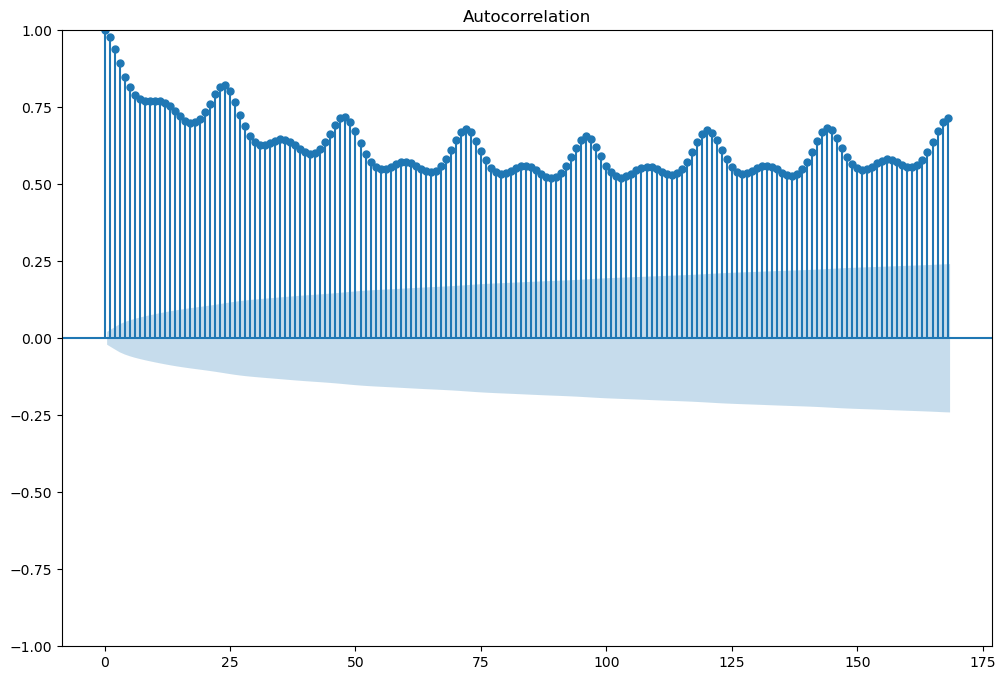

In [17]:
acf = plot_acf(df_energy_climate_2021['energy_price'], lags=168)
# pacf = plot_pacf(df_energy_climate_2021['energy_price'], lags=96)

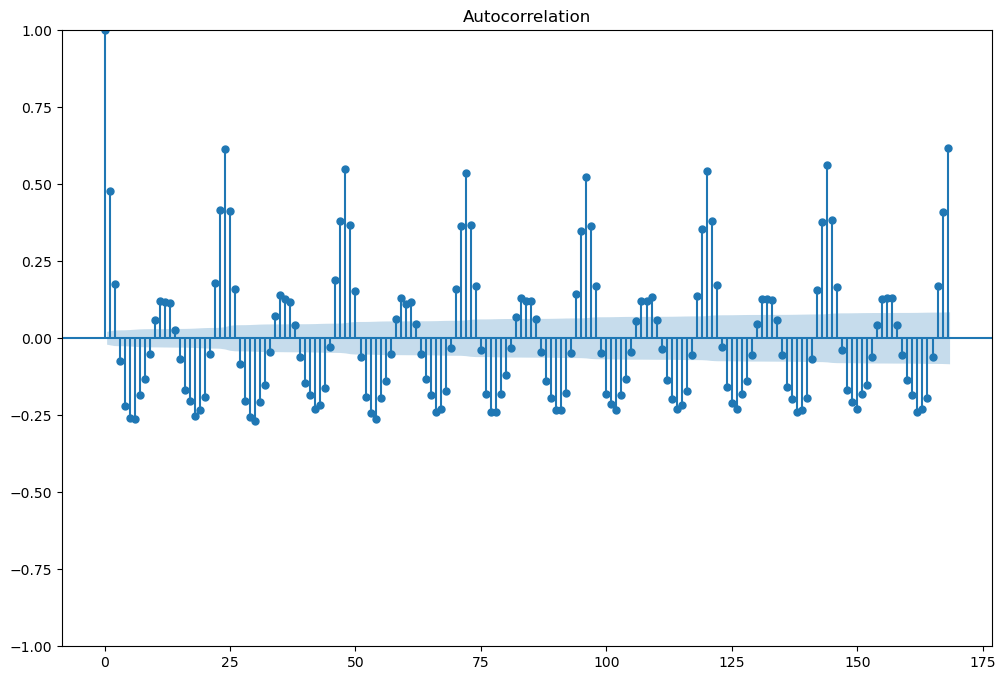

In [19]:
# behavior in 1 week
diff_week = plot_acf(df_energy_climate_2021["energy_price"].diff().dropna(), lags=168)

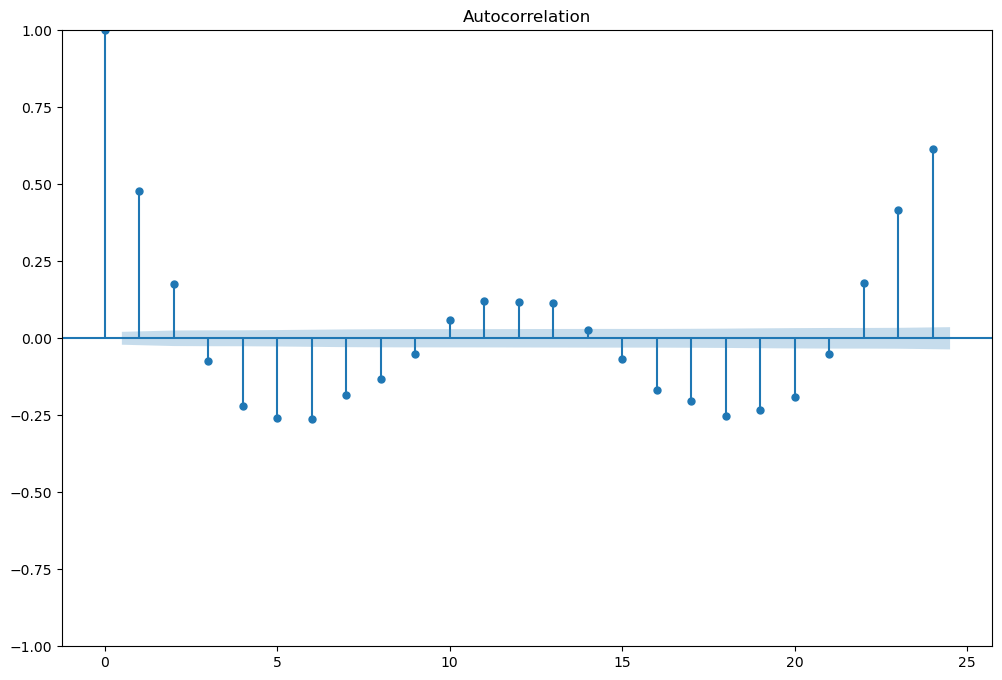

In [20]:
# behavior in 1 day
diff_day = plot_acf(df_energy_climate_2021["energy_price"].diff().dropna(), lags=24)

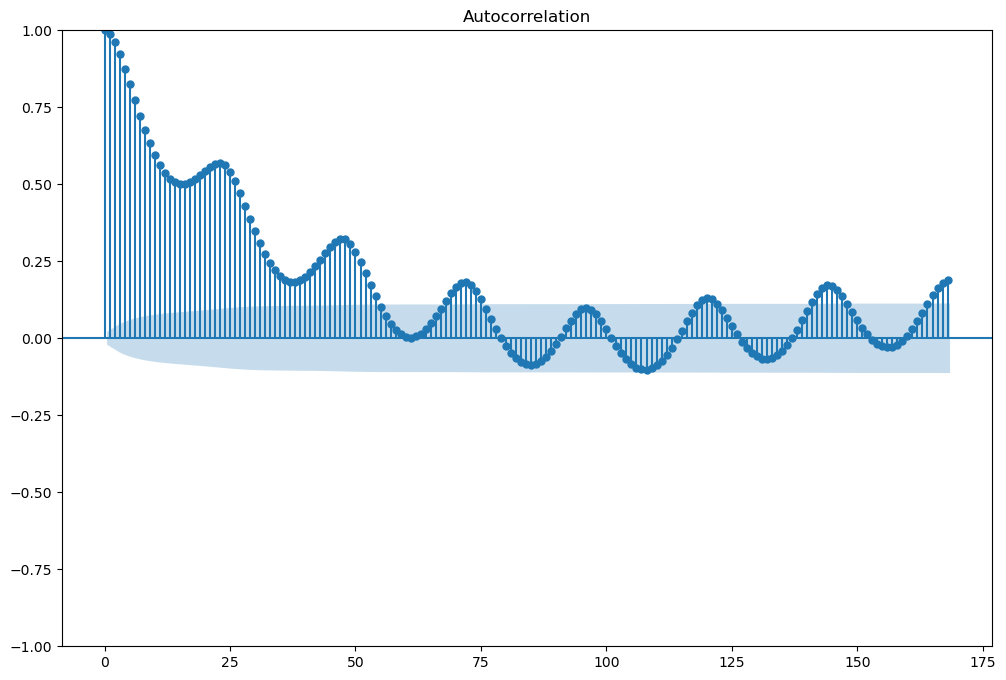

In [21]:
acf = plot_acf(df_energy_climate_2021['wind_speed'], lags=168)

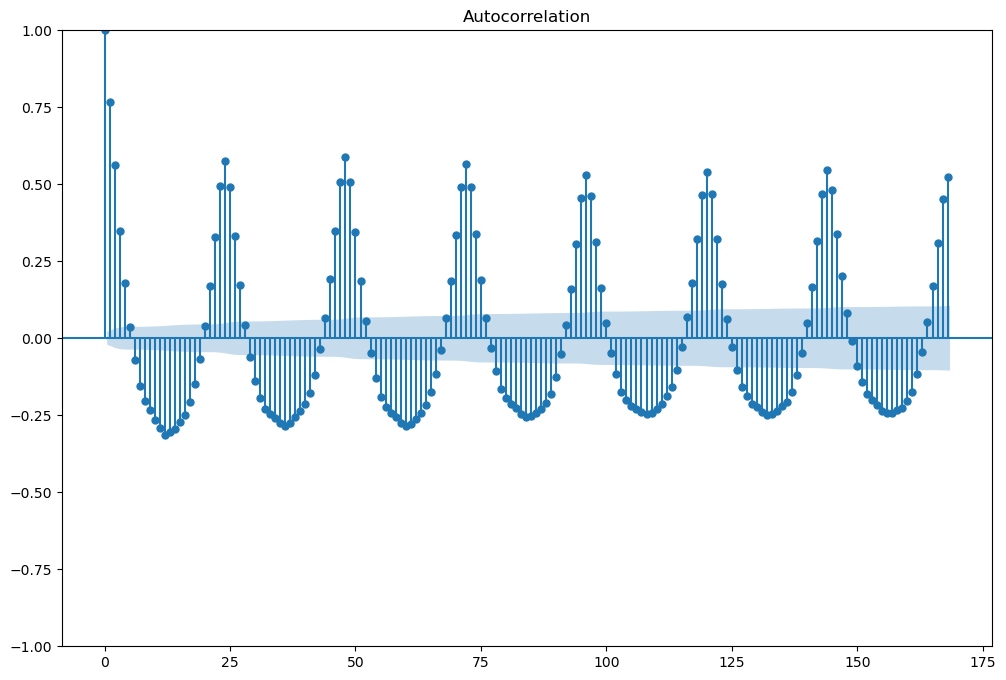

In [22]:
diff_week = plot_acf(df_energy_climate_2021["wind_speed"].diff().dropna(), lags=168)

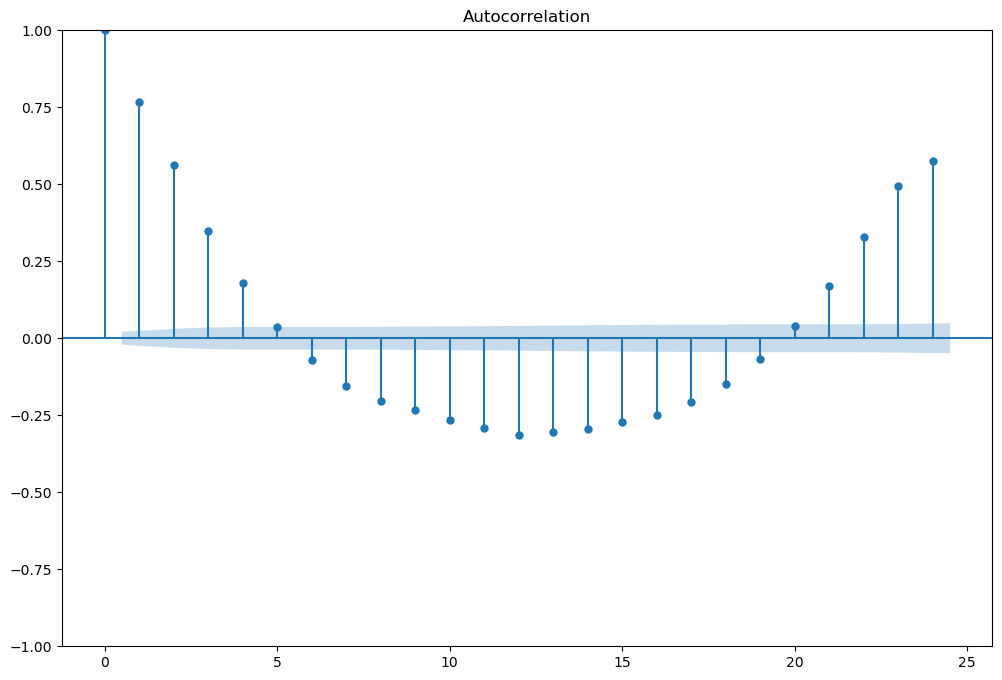

In [23]:
diff_day = plot_acf(df_energy_climate_2021["wind_speed"].diff().dropna(), lags=24)

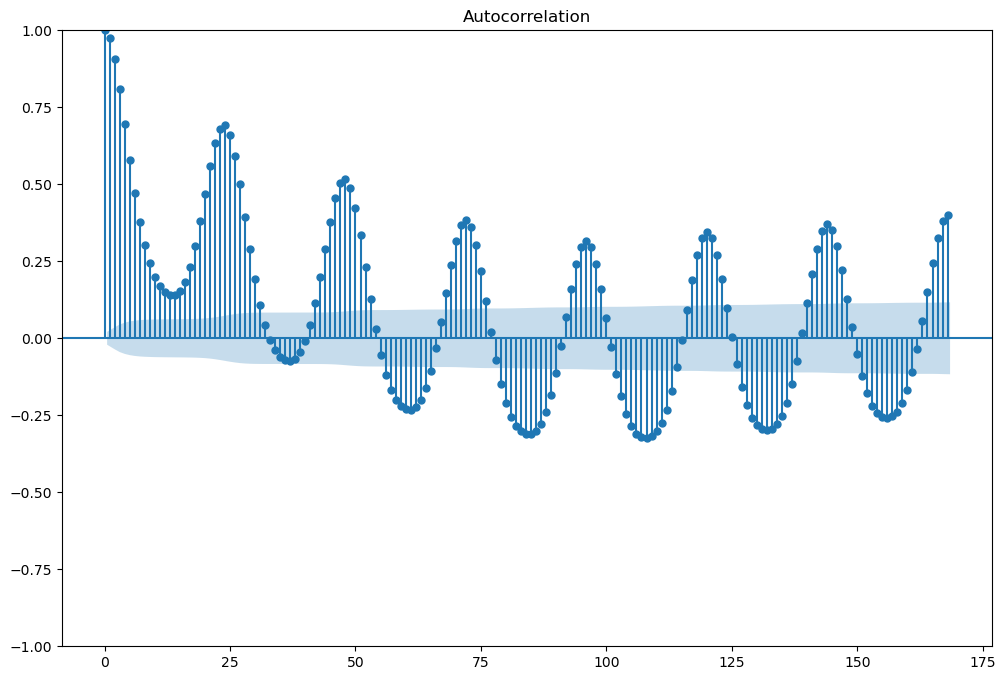

In [25]:
acf = plot_acf(df_energy_climate_2021['renewable'], lags=168)

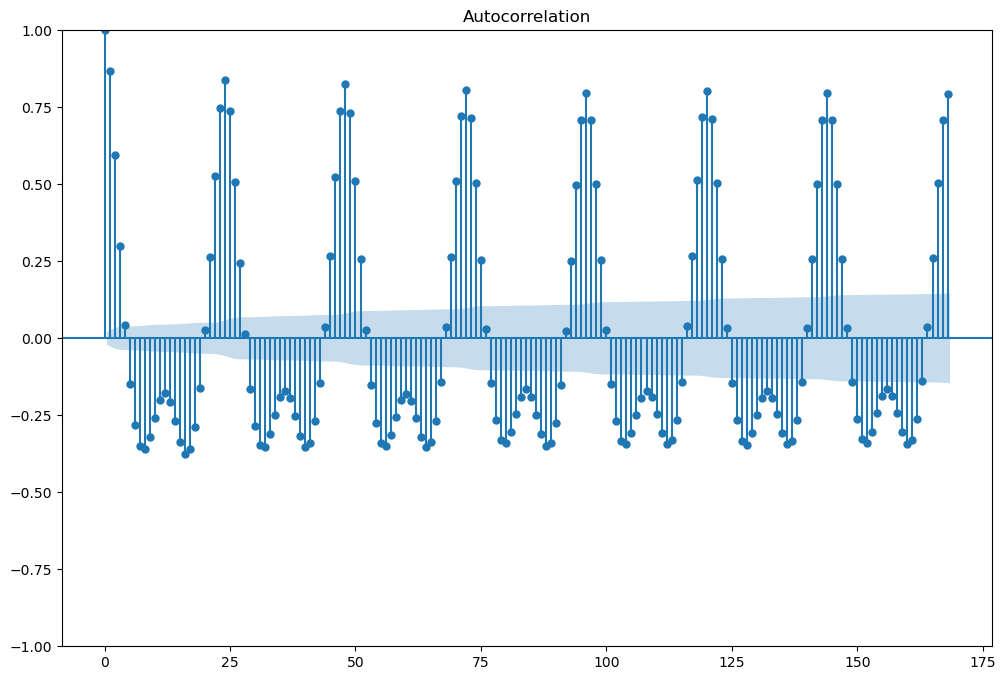

In [29]:
diff_week = plot_acf(df_energy_climate_2021["renewable"].diff().dropna(), lags=168)

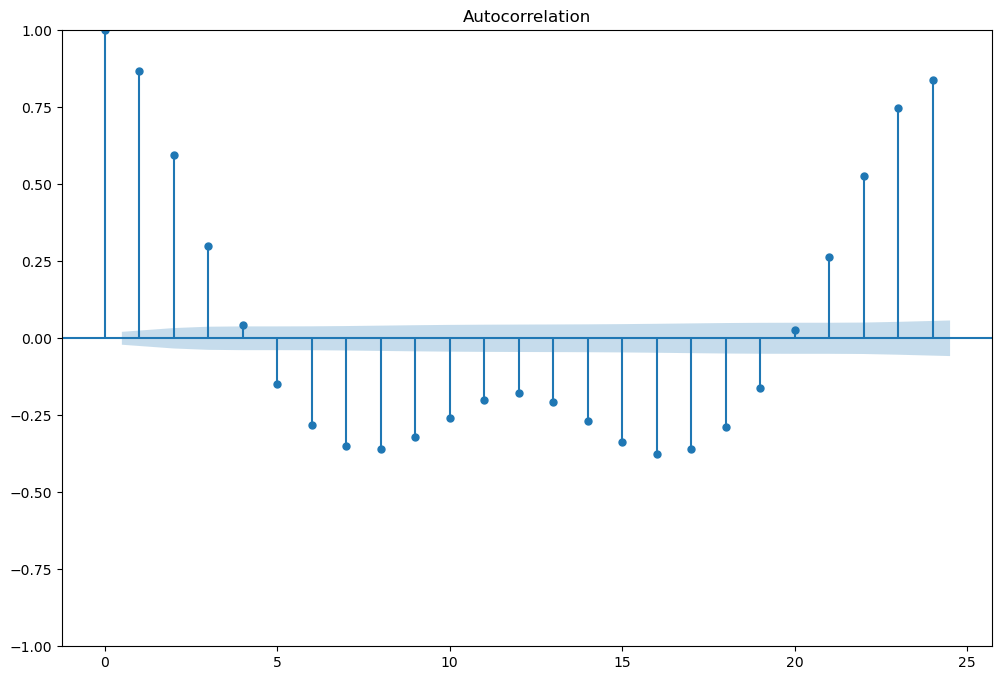

In [30]:
diff_day = plot_acf(df_energy_climate_2021["renewable"].diff().dropna(), lags=24)